Importing the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Importing the Dataset

In [2]:
df = pd.read_csv("Phishing Data - Phishing Data.csv")
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


Data Preprocessing:
* Checking for Missing Values
* Feature Selection
* Encoding variables - Applying 'OneHotEncoding' to all the features as there are no categorical features.
* Splitting data into Training and Test Sets.

In [3]:
#Checking for Missing Values
df.isna().sum()


having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

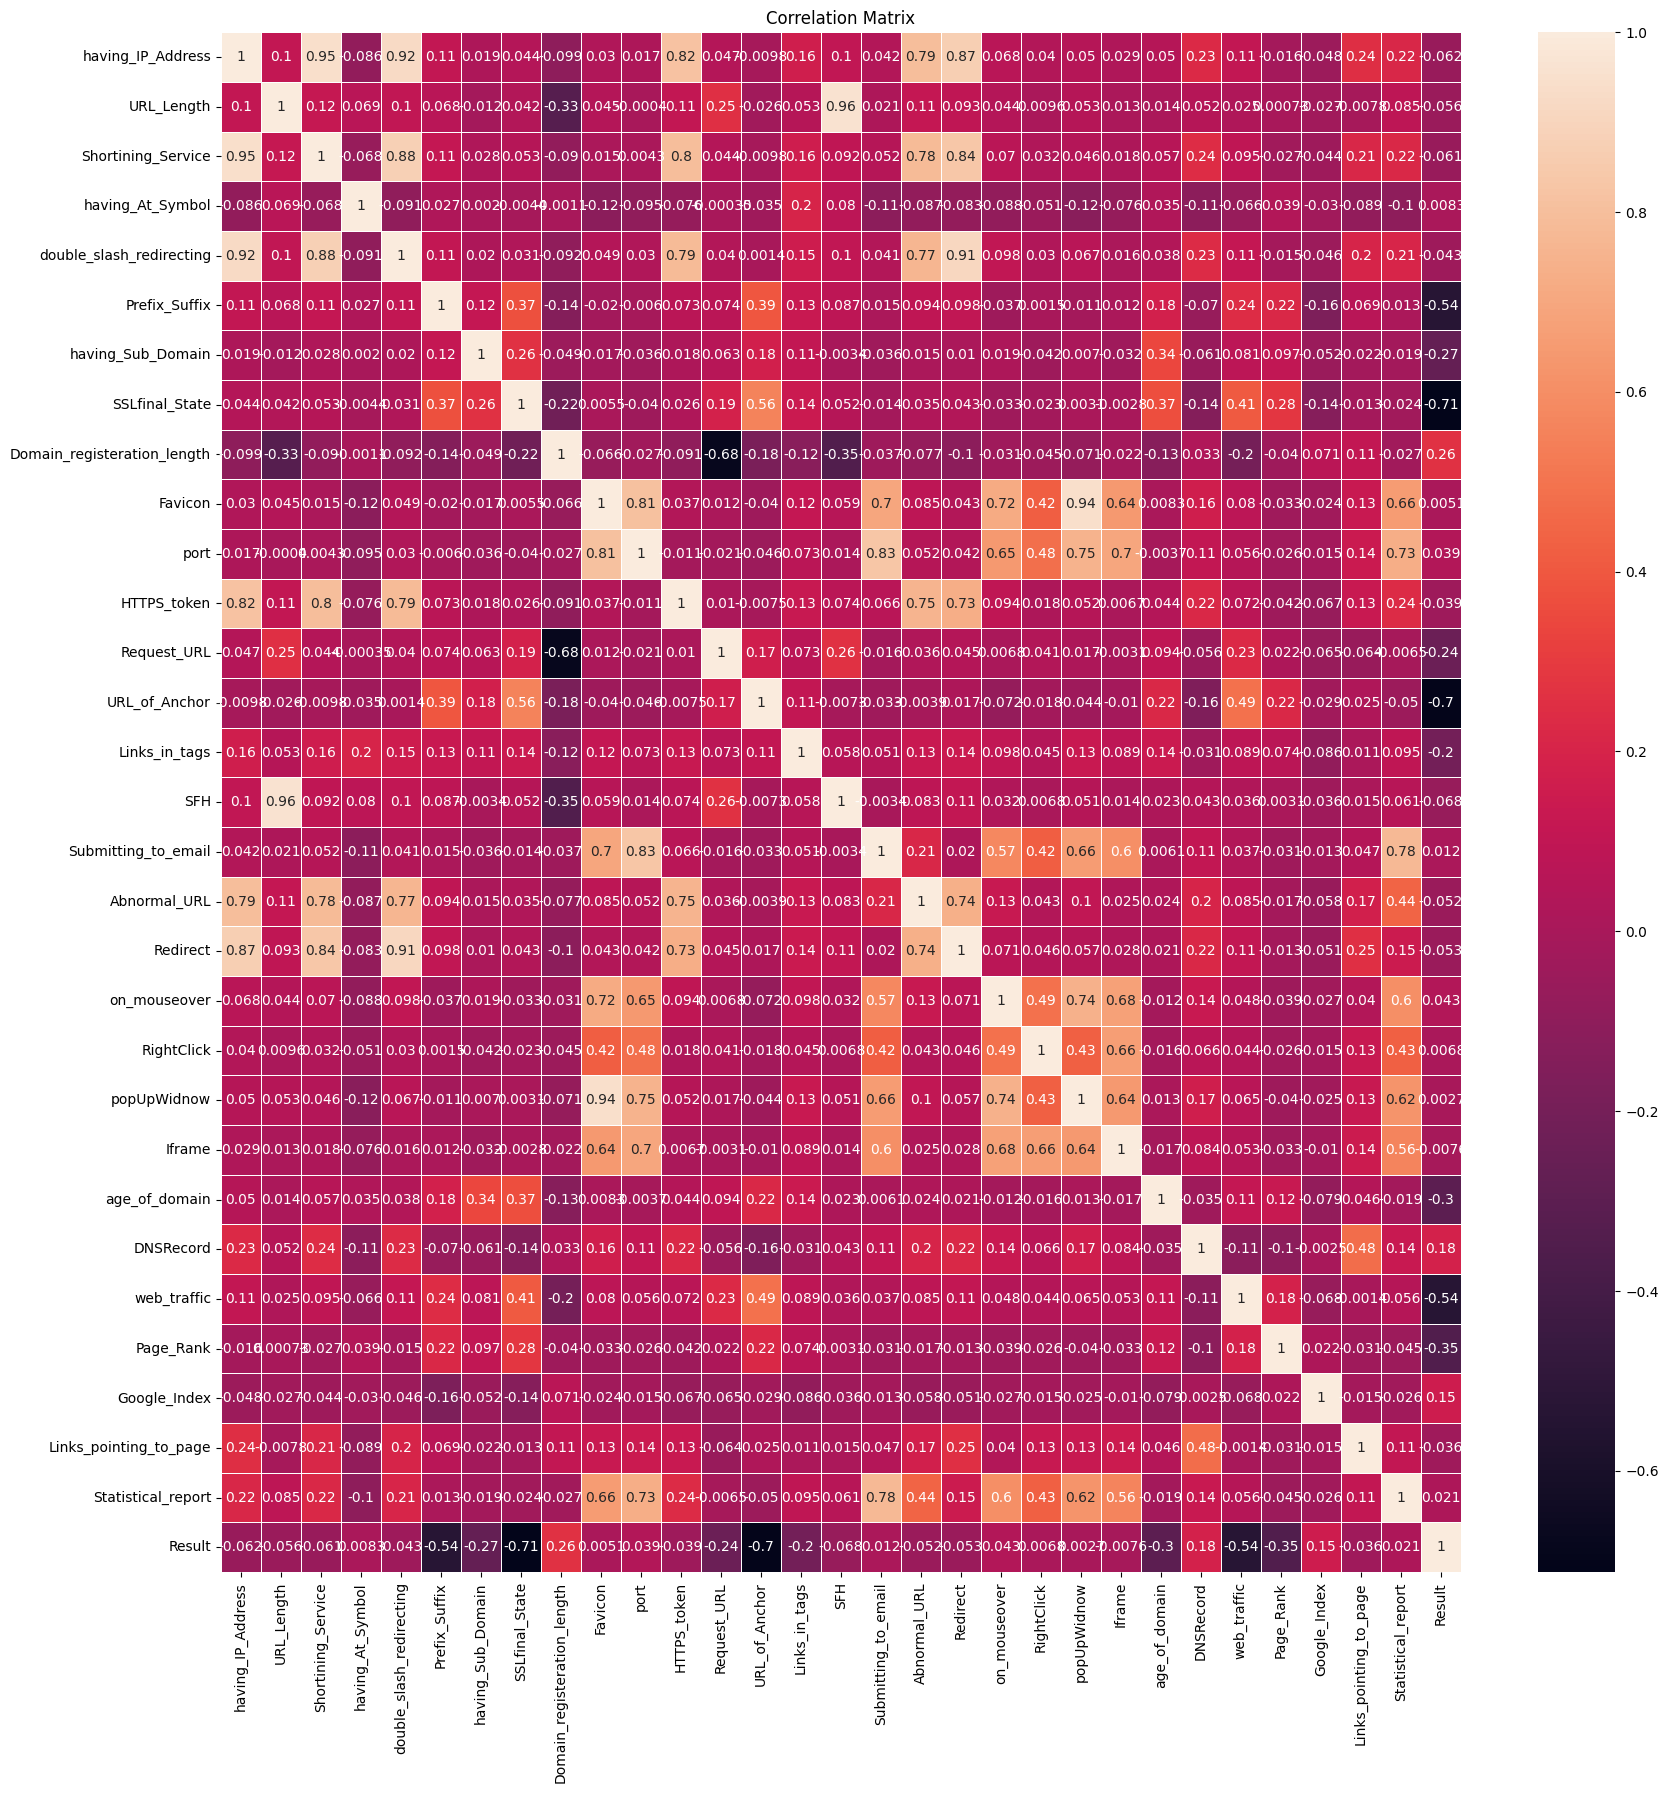

In [24]:
# Forming the Correlation Matrix to look up important features:
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix,annot=True,linewidths=0.5)
plt.savefig("CorrelationMatrix.png")
plt.title("Correlation Matrix")
plt.show()



In [5]:
target_correlation = correlation_matrix['Result'].abs().sort_values(ascending=False)
target_correlation

Result                         1.000000
SSLfinal_State                 0.712876
URL_of_Anchor                  0.699608
Prefix_Suffix                  0.537020
web_traffic                    0.535545
Page_Rank                      0.350812
age_of_domain                  0.300330
having_Sub_Domain              0.266514
Domain_registeration_length    0.260157
Request_URL                    0.243759
Links_in_tags                  0.204575
DNSRecord                      0.183854
Google_Index                   0.151763
SFH                            0.067708
having_IP_Address              0.061623
Shortining_Service             0.061175
URL_Length                     0.055605
Redirect                       0.052760
Abnormal_URL                   0.052093
on_mouseover                   0.042706
double_slash_redirecting       0.042536
HTTPS_token                    0.039071
port                           0.038609
Links_pointing_to_page         0.035779
Statistical_report             0.021377


In [8]:
#Setting Threshold value to 20% in order to take out the important features
threshold = 0.2
important_features = target_correlation[target_correlation > threshold].index
important_features = important_features.drop("Result")
important_features

Index(['SSLfinal_State', 'URL_of_Anchor', 'Prefix_Suffix', 'web_traffic',
       'Page_Rank', 'age_of_domain', 'having_Sub_Domain',
       'Domain_registeration_length', 'Request_URL', 'Links_in_tags'],
      dtype='object')

In [12]:
# Splitting the dataframe in Independent Features and Target Concept
X = df.drop("Result",axis=1)
y = df["Result"]
X

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,0,-1,1,-1,-1,0,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,0,-1,1,0,-1,0,1,0
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,0,1,1,-1,0,0,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,0,-1,1,1,-1,0,-1,0
4,0,0,1,0,0,-1,1,1,0,0,...,0,1,0,-1,1,0,-1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,0,-1,0,0,0,0,0,-1,1,0,...,0,0,0,-1,0,1,0,0,0,0
2452,0,-1,0,1,0,0,0,0,1,0,...,0,0,0,0,1,-1,0,0,1,0
2453,0,-1,0,0,0,0,0,1,0,0,...,0,0,0,-1,0,1,0,0,0,0
2454,0,-1,0,0,0,0,-1,-1,1,0,...,0,0,0,1,0,-1,-1,0,0,0


In [11]:
#Alternatively Selecting only Important Features
imp_X = df[important_features]
imp_X

,SSLfinal_State,URL_of_Anchor,Prefix_Suffix,web_traffic,Page_Rank,age_of_domain,having_Sub_Domain,Domain_registeration_length,Request_URL,Links_in_tags
0,-1,-1,-1,-1,-1,-1,-1,0,1,1
1,1,0,-1,0,-1,-1,0,0,1,-1
2,-1,0,-1,1,-1,0,-1,0,1,-1
3,-1,0,-1,1,-1,-1,-1,1,-1,0
4,1,0,-1,0,-1,-1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
2451,-1,-1,0,1,0,-1,0,1,-1,-1
2452,0,-1,0,-1,0,0,0,1,-1,0
2453,1,0,0,1,0,-1,0,0,1,1
2454,-1,-1,0,-1,-1,1,-1,1,1,-1


In [13]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train2,X_test2, y_train2,y_test2 = train_test_split(imp_X,y,test_size=0.2, random_state=42)

In [14]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

Initializing a Dictionary Containing all the Classification Algorithms

In [15]:
#Making a Dictionary of all the Tables
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
classifiers = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

Training the Models

1.   Training Models on All Features
2.   Training Models on Important Features



In [17]:
#1
#Training and Evaluating all the Models and storing results in results dictionary
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
results = {}
for name,mdl in classifiers.items():
  mdl.fit(X_train, y_train)
  y_pred = mdl.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred, output_dict=True)
  matrix = confusion_matrix(y_test, y_pred)
  results[name] = {'Accuracy': accuracy, 'Report': report, 'Confusion Matrix': matrix}

In [19]:
#2
#Training and Evaluating all the Models on Important Features and storing results in results2 dictionary
results2 = {}
for name,mdl in classifiers.items():
  mdl.fit(X_train2, y_train2)
  y_pred2 = mdl.predict(X_test2)
  accuracy = accuracy_score(y_test2, y_pred2)
  report = classification_report(y_test2, y_pred2, output_dict=True)
  matrix = confusion_matrix(y_test2, y_pred2)
  results2[name] = {'Accuracy': accuracy, 'Report': report, 'Confusion Matrix': matrix}

Displaying the Results of Evaluation

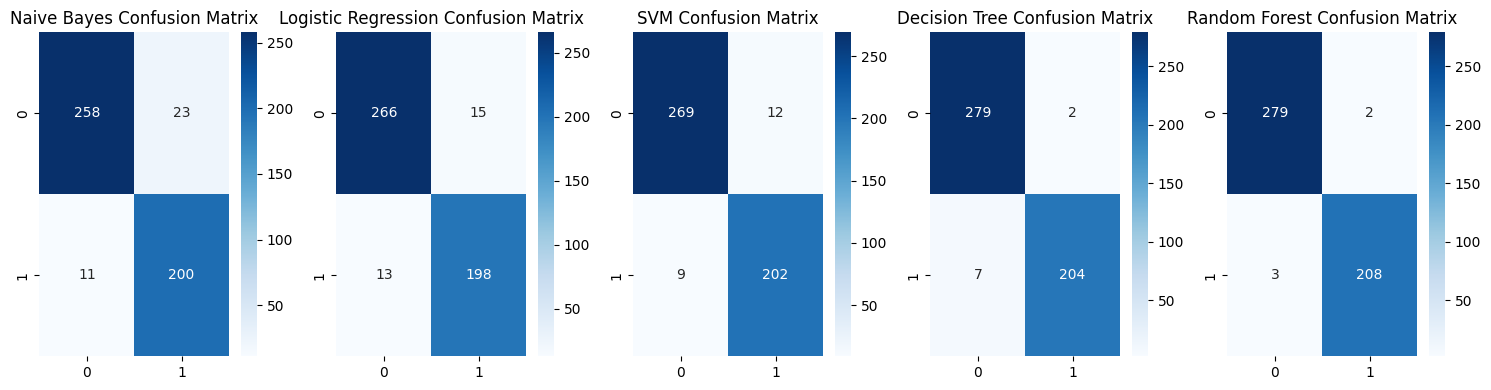

In [20]:
#Displaying Confusion Matrix of All the Models stored in results
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 4))

for (name, result), ax in zip(results.items(), axes.flatten()):
    sns.heatmap(result['Confusion Matrix'], annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_title(f'{name} Confusion Matrix')

plt.tight_layout()
plt.show()

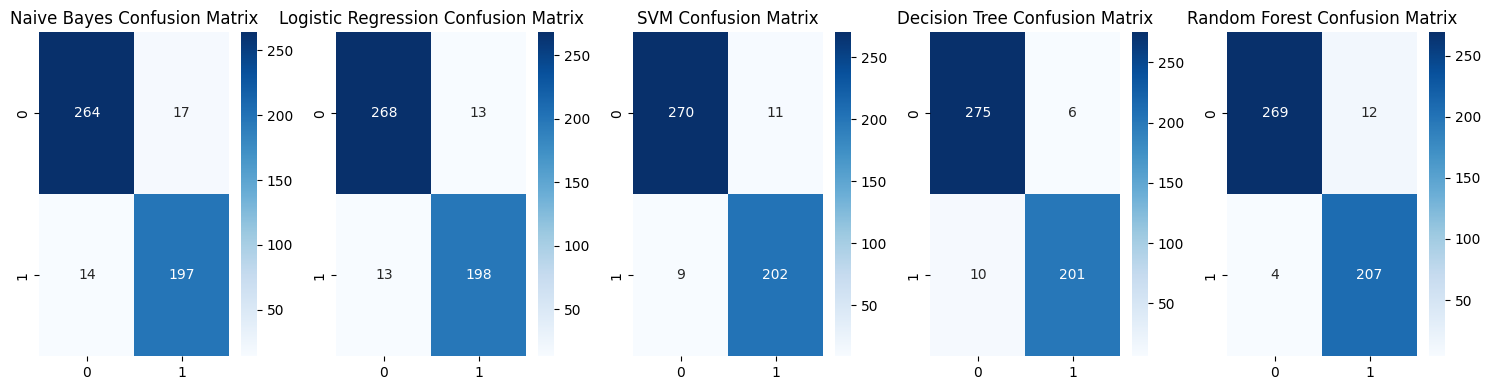

In [21]:
#Displaying Confusion Matrix of All the Models stored in results2
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 4))

for (name, result), ax in zip(results2.items(), axes.flatten()):
    sns.heatmap(result['Confusion Matrix'], annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_title(f'{name} Confusion Matrix')

plt.tight_layout()
plt.show()

In [23]:
#Displaying the Evaluation Measures stored in results and results2
table_data = {'Algorithm': list(results.keys()),
              'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
table_data2 = {'Algorithm': list(results.keys()),
              'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
for name, result in results.items():
    table_data['Accuracy'].append(result['Accuracy'])
    table_data['Precision'].append(result['Report']['weighted avg']['precision'])
    table_data['Recall'].append(result['Report']['weighted avg']['recall'])
    table_data['F1 Score'].append(result['Report']['weighted avg']['f1-score'])

for name, result in results2.items():
    table_data2['Accuracy'].append(result['Accuracy'])
    table_data2['Precision'].append(result['Report']['weighted avg']['precision'])
    table_data2['Recall'].append(result['Report']['weighted avg']['recall'])
    table_data2['F1 Score'].append(result['Report']['weighted avg']['f1-score'])

table_df = pd.DataFrame(table_data).set_index('Algorithm')
table2_df = pd.DataFrame(table_data2).set_index('Algorithm')
print("Results of models fitted with All Features\n")
print(table_df)
print("\nResults of models fitted with All Features\n")
print(table2_df)

Results of models fitted with All Features

                     Accuracy  Precision    Recall  F1 Score
Algorithm                                                   
Naive Bayes          0.930894   0.932413  0.930894  0.931096
Logistic Regression  0.943089   0.943186  0.943089  0.943122
SVM                  0.957317   0.957462  0.957317  0.957353
Decision Tree        0.981707   0.981857  0.981707  0.981678
Random Forest        0.989837   0.989840  0.989837  0.989834

Results of models fitted with All Features

                     Accuracy  Precision    Recall  F1 Score
Algorithm                                                   
Naive Bayes          0.936992   0.937169  0.936992  0.937045
Logistic Regression  0.947154   0.947154  0.947154  0.947154
SVM                  0.959350   0.959428  0.959350  0.959373
Decision Tree        0.967480   0.967529  0.967480  0.967439
Random Forest        0.967480   0.968132  0.967480  0.967547
